
# Position changes during a race

Plot the position of each driver at the end of each lap.


In [31]:
import fastf1.plotting
import matplotlib.pyplot as plt

fastf1.Cache.enable_cache('cache')
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

Load the session and create the plot



logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
logger      WARNING 	Failed to load schedule from F1 API backend!
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.1.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']


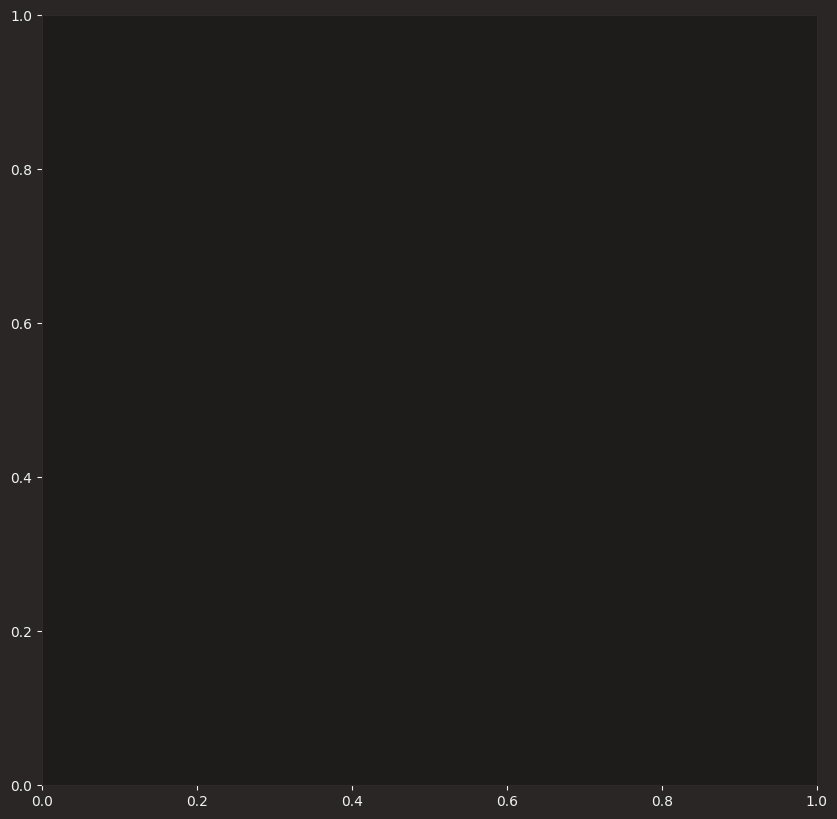

In [32]:
session = fastf1.get_session(2023, 'Bahrain', 'R')
session.load(telemetry=False, weather=False)

fig, ax = plt.subplots(figsize=(10, 10))

For each driver, get their three letter abbreviation (e.g. 'HAM') by simply
using the value of the first lap, get their color and then plot their
position over the number of laps.



In [33]:
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)

Finalize the plot by setting y-limits that invert the y-axis so that position
one is at the top, set custom tick positions and axis labels.



In [34]:
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

Text(4.444444444444452, 0.5, 'Position')

Because this plot is very crowed, add the legend outside the plot area.



In [35]:
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

<Figure size 640x480 with 0 Axes>